In [1]:
# Use MNIST Fashion Dataset and create a classifier to classify fashion clothing
#  into categories

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

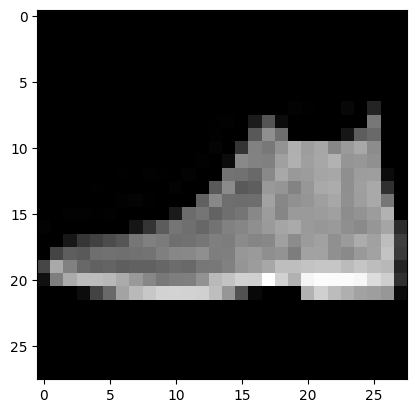

In [3]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
# The Fashion MNIST dataset is loaded. It contains 60,000 training images and 10,000 test images of fashion items (28x28 pixels).

# Display the first image in the test set
plt.imshow(x_test[0], cmap='gray')  # Use plt.imshow() to display the first image in the test set. 'cmap=gray' ensures the image is shown in grayscale.
plt.show()  # Show the image in a window.


In [4]:
# Normalize and reshape the data

# Normalize the pixel values to the range [0, 1] by dividing by 255.0
x_train = x_train.astype('float32') / 255.0  # Convert x_train to float32 and normalize pixel values to [0, 1]
x_test = x_test.astype('float32') / 255.0    # Similarly, normalize x_test pixel values

# Reshape the data to fit the input requirements of the model (e.g., CNN)
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape training data to (num_samples, 28, 28, 1), where 1 indicates grayscale channel
x_test = x_test.reshape(-1, 28, 28, 1)    # Reshape test data in the same way


In [5]:
# Define CNN model
model = keras.Sequential([  # Initialize a sequential model, where layers are stacked one after another
    keras.Input(shape=(28, 28, 1)),  # Input layer: The input is expected to have shape (28, 28, 1) for grayscale 28x28 images
    
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu'),  # Conv2D layer with 32 filters (kernels), each of size (3, 3) and ReLU activation
    layers.MaxPooling2D((2, 2)),  # MaxPooling2D layer to reduce spatial dimensions by taking the max value in 2x2 regions
    layers.Dropout(0.25),  # Dropout layer with 25% dropout rate to prevent overfitting
    
    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Conv2D layer with 64 filters and ReLU activation
    layers.MaxPooling2D((2, 2)),  # MaxPooling2D layer to further reduce spatial dimensions
    layers.Dropout(0.25),  # Another dropout layer to prevent overfitting
    
    # Third Convolutional Layer
    layers.Conv2D(128, (3, 3), activation='relu'),  # Conv2D layer with 128 filters and ReLU activation
    
    layers.Flatten(),  # Flatten the 3D output to 1D before feeding into fully connected layers
    
    # Fully Connected Layers
    layers.Dense(128, activation='relu'),  # Dense layer with 128 neurons and ReLU activation
    layers.Dropout(0.25),  # Dropout layer with 25% dropout rate to prevent overfitting
    
    # Output Layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons for the 10 classes, using softmax for multi-class classification
])


In [6]:
# Compile the model
model.compile(optimizer='adam',  # Adam optimizer is used for training, which is adaptive and generally works well.
              loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy is used for multi-class classification when labels are integers.
              metrics=['accuracy'])  # Track accuracy as the performance metric during training and evaluation.


In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7165 - loss: 0.7676 - val_accuracy: 0.8645 - val_loss: 0.3713
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8588 - loss: 0.3818 - val_accuracy: 0.8823 - val_loss: 0.3201


In [8]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)  # Evaluate the model's performance on the test data and get loss and accuracy.

# Print the test accuracy
print("Test accuracy:", test_acc)  # Output the accuracy of the model on the test dataset.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.3250
Test accuracy: 0.8823000192642212
